## import bibliothèque

In [12]:
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.io import wavfile

import librosa
import librosa.display
import seaborn as sns

import scipy
try:
    from pydub import AudioSegment
except:
    !pip install pydub
    from pydub import AudioSegment

In [13]:
def CreerDossierSauvegarde(ou,doss):
    nomEmplacementSauvegarde = ou + "/" + doss
    if not os.path.exists(nomEmplacementSauvegarde):
        os.mkdir(nomEmplacementSauvegarde)
        return nomEmplacementSauvegarde
    else:
        return nomEmplacementSauvegarde

## Choix du Drumkit

In [14]:
# Le dossier de sauvegarde DRIVE
from google.colab import drive,files
drive.mount('/content/gdrive')
!ls /content

LEDOSSIER = "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST"
print(os.listdir(LEDOSSIER))
DRUMKITS_LEDOSSIER = [LEDOSSIER + "/" + d for d in os.listdir(LEDOSSIER) if d != "backups"]
l_dossiers_veski = ['fx','bonus',"loops",'melodies', 'mixer','riser', 'scales', 'master' ]
print(DRUMKITS_LEDOSSIER)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data
['Material ~ Drum Kit (DrumDigger)', 'prodbyjack - THEDRUMCOLLECTION', 'FabeStar ~ DrumStar', 'Cxdy ~ Drum Kit', 'TheKitPlug ~ Drum Kit', 'backups']
['/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)', '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/prodbyjack - THEDRUMCOLLECTION', '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/FabeStar ~ DrumStar', '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Cxdy ~ Drum Kit', '/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/TheKitPlug ~ Drum Kit']


# La machine

## Création de la playlist

• Snare x2 - hit-hat x3 - 808 x1

In [15]:
def select_files(orig, l_veski,i = 0,prof=0,select_dic = {}):
    if prof == 0:
        print(" -•-",orig.split("/")[-1])
        prof+=1

    espace = "  | "*prof
    audioext = ['.wav','.ogg']

    if os.path.exists(str(orig)):
        listefichiers = os.listdir(orig)
        for fil in listefichiers:
            ok_veski = sum([(v in fil.lower()) for v in l_veski])
            fil = orig + "/" + fil
            if os.path.isdir(fil): #si dossier
                if not ok_veski:
                    print(espace,"-•-",fil.split("/")[-1],f"*{len(os.listdir(fil))}*")
                    i,select_dic = select_files(fil, l_veski,i,prof+1,select_dic)    
            else: # si fichier
                
                
                bay, ext = os.path.splitext(fil)
                if ext in audioext: #si fichier audio
                    print( espace,f"[{i}] :",fil.split("/")[-1])
                    #ecouter(fil)
                    select_dic[i] = fil
                i+=1
        return i,select_dic


In [16]:
def create_playlist(DRUMKIT_LEDOSSIER, okSuffle = False):
    N, dic_playlist = select_files(DRUMKIT_LEDOSSIER,l_dossiers_veski )
    playlist = list(dic_playlist.values())

    if okSuffle:
        return  random.sample(playlist, len(playlist))
    else:
        return playlist

playlist = create_playlist(DRUMKITS_LEDOSSIER[0])

 -•- Material ~ Drum Kit (DrumDigger)
  |  -•- 808's *56*
  |   |  [0] : 808 - 0007.wav
  |   |  [1] : 808 - 0009.wav
  |   |  [2] : 808 - 0017.wav
  |   |  [3] : 808 (9).wav
  |   |  [4] : Layer this with any Bass sample.wav
  |   |  [5] : 808 (2).wav
  |   |  [6] : 808_2.wav
  |   |  [7] : 808FromHere.wav
  |   |  [8] : 808 D.wav
  |   |  [9] : 808.wav
  |   |  [10] : 808 2.wav
  |   |  [11] : VIOLENT 808 (2).wav
  |   |  [12] : VIOLENT 808 (3).wav
  |   |  [13] : codeine 808 (4).wav
  |   |  [14] : codeine 808 (10).wav
  |   |  [15] : codeine 808 (8).wav
  |   |  [16] : codeine 808 (9).wav
  |   |  [17] : codeine 808 (2).wav
  |   |  [18] : codeine 808 (1).wav
  |   |  [19] : codeine 808 (3).wav
  |   |  [20] : 808 (8).wav
  |   |  [21] : 808 (1).wav
  |   |  [22] : 808 (6).wav
  |   |  [23] : SM_808 (2).wav
  |   |  [24] : SM_808 (6).wav
  |   |  [25] : SM_808 (5).wav
  |   |  [26] : SM_808 (3).wav
  |   |  [27] : !DRUMDIGGER BASS (2).wav
  |   |  [28] : @drdig_808_04.wav
  |   |  

In [17]:
playlist

["/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)/808's/808 - 0007.wav",
 "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)/808's/808 - 0009.wav",
 "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)/808's/808 - 0017.wav",
 "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)/808's/808 (9).wav",
 "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)/808's/Layer this with any Bass sample.wav",
 "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/Material ~ Drum Kit (DrumDigger)/808's/808 (2).wav",
 "/content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIS

### Audio Overview

Audio Sampling Rate: 22050 samples/sec
Total Samples: 16538
Audio Length: 0.75 s


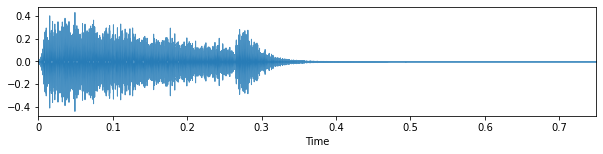

In [18]:
choix = playlist[200]

y, sr = librosa.load(choix)
plt.figure(figsize=(10, 2))

print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(y)))
secs=round(np.size(y)/sr,2)
print('Audio Length: '+str(secs)+' s')
librosa.display.waveplot(y, sr,alpha=0.8)

AudioSegment.from_wav(choix)

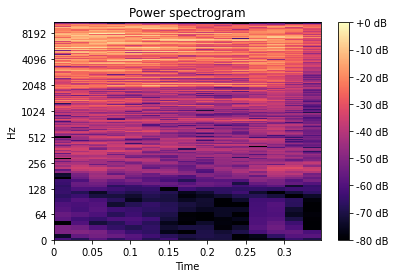

In [19]:
S = np.abs(librosa.stft(y))
S_amp = librosa.amplitude_to_db(S, ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_amp[:,0:15],
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [20]:
def plus_grand_power(liste,N = 3):
    liste = list(liste)
    res = []
    resi = []
    base = liste[:]
    somme = 0
    for k in range(N):
        i = liste.index(max(liste) )
        m = liste.pop(i)
        somme += m

        resi.append( base.index( m) )
        res.append( m )
    return res,resi, round(somme/N,5)

def plus_grand_freq(psd,freqs, N = 5):
    grands_power, grands_power_index,grands_moy = plus_grand_power(psd,N)
    return freqs[grands_power_index], freqs[grands_power_index].mean()


In [21]:
"""

sampFreq, sound = wavfile.read(choix)

sound = sound / 2.0**15

print(sound.shape)
length_in_s = sound.shape[0] / sampFreq
print(round(length_in_s,2),"sec")

time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s
print(len(time))

if sound.shape[1] > 1:
    signal = sound[:,0]


#time = time[:1000//10]
#signal = signal[:1000//10]

plt.plot(time, signal)
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()"""

'\n\nsampFreq, sound = wavfile.read(choix)\n\nsound = sound / 2.0**15\n\nprint(sound.shape)\nlength_in_s = sound.shape[0] / sampFreq\nprint(round(length_in_s,2),"sec")\n\ntime = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s\nprint(len(time))\n\nif sound.shape[1] > 1:\n    signal = sound[:,0]\n\n\n#time = time[:1000//10]\n#signal = signal[:1000//10]\n\nplt.plot(time, signal)\nplt.xlabel("time, s")\nplt.ylabel("Signal, relative units")\nplt.show()'

In [22]:
"""
plt.figure(figsize=(16, 8))

fft_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

fft_spectrum_abs = np.abs(fft_spectrum)
print(fft_spectrum.shape)

plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()
"""

'\nplt.figure(figsize=(16, 8))\n\nfft_spectrum = np.fft.rfft(signal)\nfreq = np.fft.rfftfreq(signal.size, d=1./sampFreq)\n\nfft_spectrum_abs = np.abs(fft_spectrum)\nprint(fft_spectrum.shape)\n\nplt.plot(freq, fft_spectrum_abs)\nplt.xlabel("frequency, Hz")\nplt.ylabel("Amplitude, units")\nplt.show()\n'

In [25]:
def frequency(song_path):

    sampFreq, sound = wavfile.read(song_path)
    sound = sound / 2.0**15
    length_in_s = sound.shape[0] / sampFreq
    time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s

    if len(sound.shape) > 1:
        signal = sound[:,0]
    else:
        signal = sound
    fft_spectrum = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

    fft_spectrum_abs = np.abs(fft_spectrum)
    return plus_grand_freq(fft_spectrum_abs,freq, 50)[1]

#https://rangeofsounds.com/blog/how-to-eq-an-808/
def label_from_freq(freq):
    if freq <= 250:
        return "bass"
    elif freq <= 2500:
        return "middle"
    else:
        return "high"

test = playlist[195]
print(test.split('/')[-1])
print(frequency(test), label_from_freq(frequency(test)))


ZHAT05.wav
5315.943474264706 high


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


## Lecture

In [26]:
one_seconds = 1000
vide_wav_path = "/content/gdrive/Shareddrives/# Zone de Code #/• Wanabilini The Producer TOOLS/empty.wav"
vide_wav = AudioSegment.from_wav(vide_wav_path)[0:one_seconds]
vide_wav = vide_wav *10

def jouer_combien_fois(label):
    if label == "bass":
        return 1, 2*one_seconds, 0, 0.9  
    elif label == "middle":
        return 2,1*one_seconds,   0.4, 1.05  
    elif label == "high":
        return 3,0.45*one_seconds,  0.1, 1  
    else:
        return 1,1*one_seconds,  0, 1  


def loadSong(song_path):
    
    try:
        bay, ext = os.path.splitext(song_path)
        if ext == ".mp3":
            return AudioSegment.from_mp3(song_path)[0:one_seconds*1] 
        elif ext == ".wav":
            cb, cut_sec, delay_sec_inter,delay_sec_intra = jouer_combien_fois(label_from_freq(frequency(song_path)))
            return  (AudioSegment.from_wav(song_path)[0:cut_sec] + vide_wav[0:delay_sec_inter*one_seconds] ) * cb + vide_wav[0:delay_sec_intra*one_seconds]
        elif ext == ".ogg":
            return  AudioSegment.from_ogg(song_path)[0:one_seconds*1]
        else:
            return vide_wav[0:0.00005*one_seconds]
    except:
        print("error load",song_path)
        return None
    else:
        return None

   

loadSong(playlist[100])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
def AfficherAudio(filename_list):
    if filename_list:
        #premier sons
        song = loadSong(filename_list[0])
        if song:
            # ajouter les autres sons
            if len(filename_list) > 1:
                for i,f in enumerate(filename_list[1:]):
                    song += loadSong(f)
                    print(f"{int(((i+1)/len(filename_list))*100)}%", end="")    
    return song

SAVE_DOSS = CreerDossierSauvegarde(LEDOSSIER,"backups")
def mp3_file_exist(title,okShuffle = False):
    print(int(okShuffle) )
    return os.path.exists(SAVE_DOSS + "/" + title +f' (shuffle={int(okShuffle)}).mp3')

def create_audio_from_list(DRUMKITS_LEDOSSIER,okShuffle = False):
    
    for DRUMKIT in DRUMKITS_LEDOSSIER:
        titre = DRUMKIT.split('/')[-1]
        if not mp3_file_exist(titre,okShuffle):
            drumkit_res = AfficherAudio(create_playlist(DRUMKIT,okShuffle))
            if drumkit_res:
                drumkit_res.export(SAVE_DOSS + "/" + titre +f' (shuffle={int(okShuffle)}).mp3', format='mp3')
        else:
            print(titre + " *ya deja chkl* "+f' (shuffle={int(okShuffle)}).mp3', "##"*20)

    return 1

# • GOOO

In [28]:
create_audio_from_list(DRUMKITS_LEDOSSIER, True)

1
Material ~ Drum Kit (DrumDigger) *ya deja chkl*  (shuffle=1).mp3 ########################################
1
 -•- prodbyjack - THEDRUMCOLLECTION
  |  -•- Boom Bap - Lofi *7*
  |   |  -•- Bass *11*
  |   |   |  [1] : Classic Bass (lofi).wav
  |   |   |  [2] : Plucky Bass (lofi).wav
  |   |   |  [3] : [PS] Classic Bass (lofi).wav
  |   |   |  [4] : [PS] Clean Bass (lofi).wav
  |   |   |  [5] : [PS] Dark Bass (lofi).wav
  |   |   |  [6] : [PS] Deep Bass (lofi).wav
  |   |   |  [7] : [PS] Hard Bass (lofi).wav
  |   |   |  [8] : [PS] Low Bass (lofi).wav
  |   |   |  [9] : [PS] Noise Bass (lofi).wav
  |   |   |  [10] : [PS] Plucky Bass (lofi).wav
  |   |   |  [11] : [PS] Vinyl Bass (lofi).wav
  |   |  -•- Hi Hat *25*
  |   |   |  [12] : Airy Hi Hat (lofi).wav
  |   |   |  [13] : Classic Hi Hat (lofi).wav
  |   |   |  [14] : Filtered Hi Hat (lofi).wav
  |   |   |  [15] : [PS] Airy Hi Hat (lofi).wav
  |   |   |  [16] : [PS] Classic Hi Hat (lofi).wav
  |   |   |  [17] : [PS] Clean Hi Hat (lofi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


error load /content/gdrive/Shareddrives/# Zone de Code #/Zone de lavage de Drumkits - Data/• PLAYLIST/prodbyjack - THEDRUMCOLLECTION/Drill - Trap/Snare/[PS] Rim Snare (drill).wav


TypeError: ignored